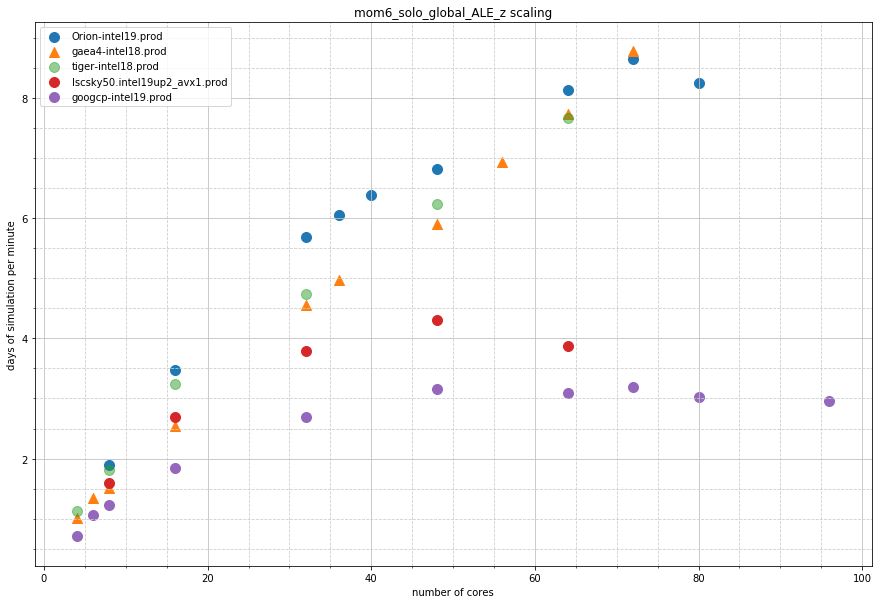

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import fnmatch
import os
import re
from collections import defaultdict

def listdir(dirname, pattern="*"):
    return fnmatch.filter(os.listdir(dirname), pattern)

def findfiles(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result


def timingsplot(experiment,plotAll=False):
    stdouts = findfiles("stdout*",experiment+'/')
    #print(stdouts)
    key = 'Main loop'
    timing_regex ='\s*' + re.escape(key) + r'\s* ([-+]?\d*\.\d+|\d+)\s*([-+]?\d*\.\d+|\d+)\s*([-+]?\d*\.\d+|\d+)\s*([-+]?\d*\.\d+|\d+)\s*([-+]?\d*\.\d+|\d+)\s*(\d+)\s*(\d+)\s*(\d+)'

    table=defaultdict(list)
    for stdout in stdouts:
        n = re.match('(\S+)\/stdout.(.*).n\d+',stdout)
        exp = n.group(1)
        plat= n.group(2)
        for line in open(stdout,"r"):
            m = re.match(timing_regex,line)
            if m:
    #            print(1+int(m.group(8)),float(m.group(2)))
                table[plat].append((1+int(m.group(8)),60./float(m.group(2))))


    plt.figure(figsize=(15,10))

    if(plotAll):
        for k, v in table.items():
            plt.scatter(*zip(*v),label=k,s=100,marker='o')
    else: #plot a selected subset   
        for k, v in table.items():
            if('Orion' in k and 'prod' in k):
                plt.scatter(*zip(*v),label=k,s=100,marker='o')
            if('gaea' in k and 'prod' in k):
                plt.scatter(*zip(*v),label=k,s=100,marker='^')
            if('tiger' in k and 'prod' in k):
                plt.scatter(*zip(*v),label=k,s=100,marker='o',alpha=0.5)
        for k, v in table.items():
            if('lscsky50' in k and 'prod' in k):
                plt.scatter(*zip(*v),label=k,s=100,marker='o')
            if('googcp' in k and 'prod' in k):
                plt.scatter(*zip(*v),label=k,s=100,marker='o')

    #plt.setp(l, markersize=30)        

    plt.xlabel('number of cores')
    plt.ylabel('days of simulation per minute')
    plt.grid(True,which='major',linestyle='-', color='0.75')
    plt.grid(True,which='minor',linestyle='--',color='0.80')
    plt.minorticks_on()
    plt.legend()
    plt.title(experiment + ' scaling')
    plt.savefig(experiment+'scaling.png')
    
timingsplot(experiment='mom6_solo_global_ALE_z')
   

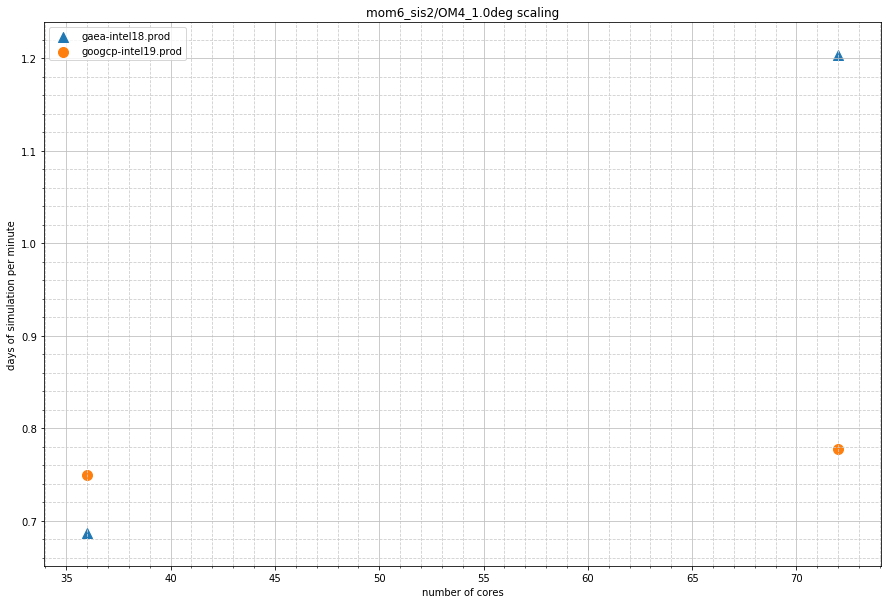

In [15]:
timingsplot(experiment='mom6_sis2/OM4_1.0deg')


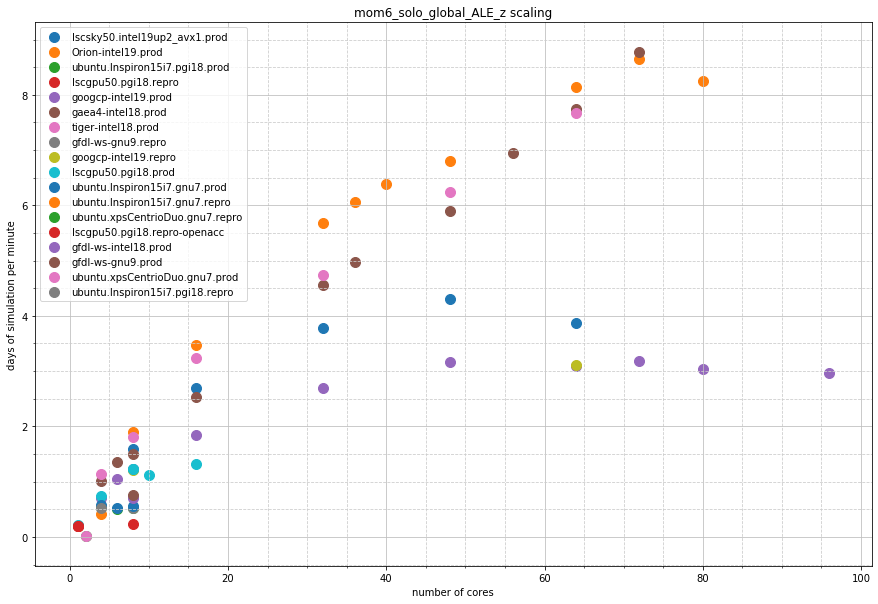

In [9]:
timingsplot(experiment='mom6_solo_global_ALE_z',plotAll=True)